In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


In [169]:
# Reading Data
data = pd.read_csv(r'E:\Eg Fwd\KaggleV2-May-2016.csv')
data.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


## 1- EDA

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [166]:
# Statistical describe of data
data.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
count,1.069870e+05,1.069870e+05,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000
mean,1.472814e+14,5.675434e+06,38.316085,0.101031,0.203772,0.074243,0.031406,0.022975,0.323264,0.797359
std,2.558267e+14,7.133274e+04,22.466214,0.301371,0.402804,0.262167,0.174412,0.164115,0.467725,0.401969
min,3.921784e+04,5.030230e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.173523e+12,5.640490e+06,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,3.172463e+13,5.680744e+06,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,9.433600e+13,5.725634e+06,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


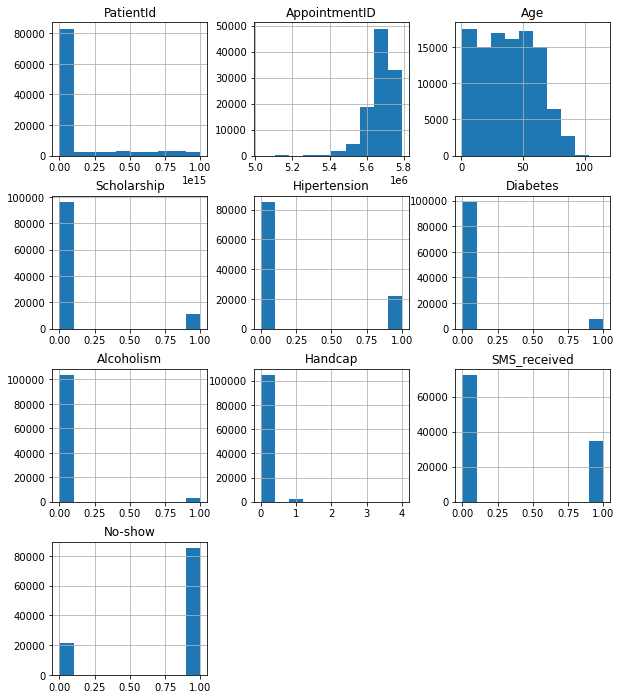

In [165]:
# Making a histogram for all features in the data
data.hist(figsize=(10,12))
plt.show()

# 2- Cleaning Data
### Explore Null & Duplicates

In [33]:
# Showing Number of null values in each column
data.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [34]:
# Showing Nymber of Duplicates
data.duplicated().sum()

0

### Making a histogram of Age column

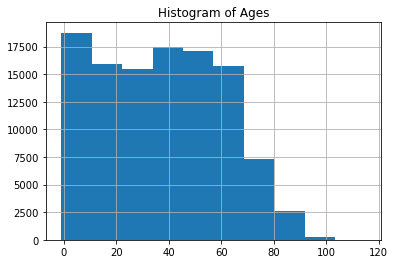

In [170]:
plt.hist(data['Age'])
plt.title('Histogram of Ages')
plt.grid()
plt.show()

In [173]:
# Show if there is any age less than or equal to (0)
data[data['Age']<=0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
59,7.184428e+13,5638545,F,2016-04-29T08:08:43Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,0,No
63,2.366233e+14,5628286,M,2016-04-27T10:46:12Z,2016-04-29T00:00:00Z,0,SÃO BENEDITO,0,0,0,0,0,0,No
64,1.885174e+14,5616082,M,2016-04-25T13:28:21Z,2016-04-29T00:00:00Z,0,ILHA DAS CAIEIRAS,0,0,0,0,0,1,No
65,2.718818e+14,5628321,M,2016-04-27T10:48:50Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,0,No
67,8.647128e+13,5639264,F,2016-04-29T08:53:02Z,2016-04-29T00:00:00Z,0,NOVA PALESTINA,0,0,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110345,1.473952e+14,5702537,F,2016-05-16T12:30:58Z,2016-06-01T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No
110346,5.577525e+12,5777724,M,2016-06-06T14:22:34Z,2016-06-08T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No
110454,6.142460e+11,5772400,F,2016-06-03T15:18:44Z,2016-06-03T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No
110460,4.321846e+13,5769545,F,2016-06-03T08:56:51Z,2016-06-03T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No


In [174]:
# Delete Ages less than or equal (0)
data=data[data['Age']>0]

In [175]:
# Check Again
data[data['Age']<=0].sum()

PatientId         0.0
AppointmentID     0.0
Gender            0.0
ScheduledDay      0.0
AppointmentDay    0.0
Age               0.0
Neighbourhood     0.0
Scholarship       0.0
Hipertension      0.0
Diabetes          0.0
Alcoholism        0.0
Handcap           0.0
SMS_received      0.0
No-show           0.0
dtype: float64

# 3- Dealing with Column of Attendence People

In [176]:
data["No-show"].replace({"Yes":0,"No":1},inplace=True)
data['No-show'] = data['No-show'].astype('int64')
data['No-show'].head()

0    1
1    1
2    1
3    1
4    1
Name: No-show, dtype: int64

In [177]:
people_NotAttend = data[data["No-show"]==1].count()["No-show"]
people_Attend = data[data['No-show'] == 0].count()['No-show']

In [179]:
print('Number of People who attend the appointment : ',people_Attend,
     '\nNumber of People who didnot attend the appointment : ',people_NotAttend)

Number of People who attend the appointment :  21680 
Number of People who didnot attend the appointment :  85307


In [188]:
# Calculating the number of times that number of NotAttend is duplicated to number of attend
t= people_NotAttend/people_Attend
t

3.9348247232472326

In [180]:
# Calculating the percent of attendence & not attendence
Attend_percent= (people_Attend/(people_Attend+people_NotAttend))*100
NotAttend_percent= (people_NotAttend/(people_Attend+people_NotAttend))*100
print('The Percentage of People who attend the appointment : ',Attend_percent,'%',
     '\nThe Percentage of People who didnot attend the appointment : ',NotAttend_percent,'%')

The Percentage of People who attend the appointment :  20.26414424182377 % 
The Percentage of People who didnot attend the appointment :  79.73585575817623 %


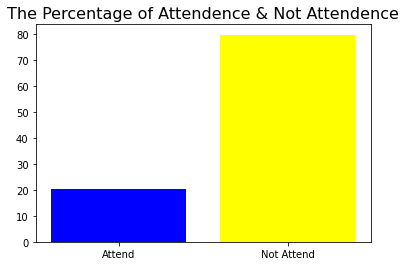

In [181]:
# Making a bar chart to visualize the percentage
plt.bar(['Attend','Not Attend'],[Attend_percent,NotAttend_percent],color=['blue','yellow'])
plt.title('The Percentage of Attendence & Not Attendence',fontsize=16)
plt.show()

# 4- Finding The Relation Between Gender & Attendence

In [182]:
# Calculating the number of attendence & not attendence with category [gender]
df=data.groupby(['Gender','No-show']).count()
df.head()

PatientId  AppointmentID  ScheduledDay  AppointmentDay    Age  \
Gender No-show                                                                  
F      0            14275          14275         14275           14275  14275   
       1            55843          55843         55843           55843  55843   
M      0             7405           7405          7405            7405   7405   
       1            29464          29464         29464           29464  29464   

                Neighbourhood  Scholarship  Hipertension  Diabetes  \
Gender No-show                                                       
F      0                14275        14275         14275     14275   
       1                55843        55843         55843     55843   
M      0                 7405         7405          7405      7405   
       1                29464        29464         29464     29464   

                Alcoholism  Handcap  SMS_received  
Gender No-show                                     
F      0             14275    14275         14275  
       1             55843    55843         55843  
M      0              7405     7405          7405  
       1             29464    29464         29464

In [183]:
# Finding values of number of attendence & not attendence of each gender
a=df.iat[0,1]
b=df.iat[1,1]
c=df.iat[2,1]
d=df.iat[3,1]

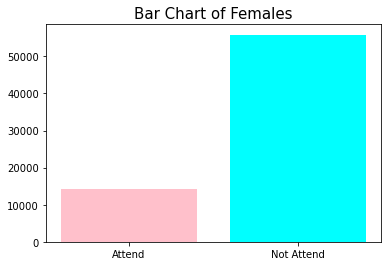

In [184]:
# Making a bar chart of number of females who attended the appointment & females who didnot attend
plt.bar(['Attend','Not Attend'],[a,b],color=['pink','cyan'])
plt.title('Bar Chart of Females',fontsize=15)
plt.show()

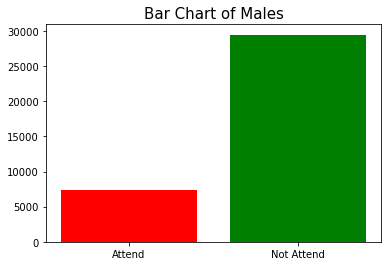

In [185]:
# Making a bar chart of number of males who attended the appointment & males who didnot attend
plt.bar(['Attend','Not Attend'],[c,d],color=['red','green'])
plt.title('Bar Chart of Males',fontsize=15)
plt.show()

### Calculating the percentage of attend & not attend for each gender and
### making a pie chart for these percentages

In [102]:
e=(a/(a+b))*100
f=(b/(a+b))*100
g=(c/(c+d))*100
h=(d/(c+d))*100

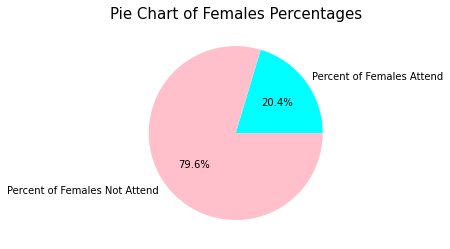

In [187]:
plt.pie([e,f],autopct='%1.1f%%',labels=['Percent of Females Attend','Percent of Females Not Attend'],colors=['cyan','pink'])
plt.title('Pie Chart of Females Percentages',fontsize=15)
plt.show()

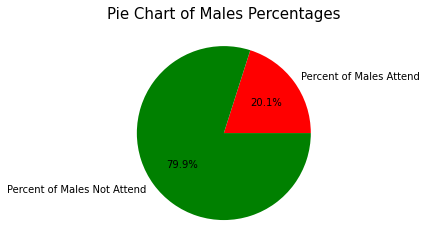

In [186]:
plt.pie([g,h],autopct='%1.1f%%',labels=['Percent of Males Attend','Percent of Males Not Attend'],colors=['red','green'])
plt.title('Pie Chart of Males Percentages',fontsize=15)
plt.show()

# 5- Calculating the Count & Percentages of Patients with Diagnosis

In [161]:
# Calculating the number of patients of each diagnose
Number_Dibetes = data.loc[data['Diabetes']==1]['Age'].count()
Number_Handcap = data.loc[data['Handcap']==1]['Age'].count()
Number_Hipertension = data.loc[data['Hipertension']==1]['Age'].count()

In [162]:
# Calculating the percentage of patients of each diagnose
diabete_percent = (Number_Dibetes/106987)*100
handcap_percent = (Number_Handcap/106987)*100
hipertension_percent = (Number_Hipertension/106987)*100

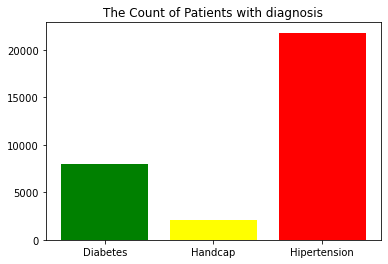

In [160]:
# Making a bar chart of number of patients people
col=['Diabetes','Handcap','Hipertension']
val=[Number_Dibetes,Number_Handcap,Number_Hipertension]
colr=['green','yellow','red']
plt.bar(col,val,color=colr)
plt.title('The Count of Patients with diagnosis')
plt.show()

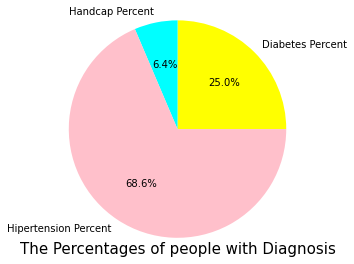

In [155]:
# Making a pie chart of percentages of patients people
vals=[diabete_percent,handcap_percent,hipertension_percent]
cols=['Diabetes Percent','Handcap Percent','Hipertension Percent']
colrs=['yellow','cyan','pink']
plt.pie(vals,autopct='%1.1f%%',labels=cols,colors=colrs,radius=1.25)
plt.xlabel('The Percentages of people with Diagnosis',fontsize=15)
plt.show()